# **First Computer Assignment**
***
### **EEE882 - Computação Evolucionária**
### **Prof. Frederico Gadelha Guimarães**
***
###### *Hugo Assis Juste*
***
###### Using Python 3 - Please consider the code comments

##  1. The N-Queens Problem

In [1]:
%matplotlib inline

##### Firstly, the population class is defined.
A population is a list of tuples: 
$[(fitness_1, individue_1),(fitness_2, individue_2),...,(fitness_n, individue_n)]$

$n$ individues of size $size$ created randomly and with the initial fitness defined as $0$

In [2]:
import random


class Population:

    def __init__(self, size, n):
        self.population = []
        for i in range(size):
            self.population.append(self.createRandomIndividue(n))

    def get(self):
        return self.population

    def set(self, population):
        self.population = population

    def createRandomIndividue(self, n):
        individue = []
        for i in range(n):
            individue.append(random.randint(1, n))
        return (0, individue)

##### Here the Genetic Algorithm class is defined.

In [3]:
import random


class GA:

    def __init__(self, n, mutation_rate):
        self.n = n
        self.mutation_rate = mutation_rate

    def selection(self, pop):
        '''
        Tournament based parent selection:
        2 random individues are picked from the population and the most fit is selected.
        This is done twice and two parents are selected.
        '''
        parents = []
        for j in range(2):
            first_candidate_index = random.randint(1, len(pop) - 1)
            second_candidate_index = random.randint(1, len(pop) - 1)
            first_candidate_fitness = pop[first_candidate_index][0]
            second_candidate_fitness = pop[second_candidate_index][0]
            if first_candidate_fitness > second_candidate_fitness:
                parents.append(pop[first_candidate_index])
            else:
                parents.append(pop[second_candidate_index])
        return parents

    def crossover(self, parents):
        '''Create siblings combining the genotype of two parents'''
        first_child = parents[0][1][:self.n // 2] + parents[1][1][self.n // 2:]
        second_child = parents[1][1][:self.n // 2] + parents[0][1][self.n // 2:]
        return [first_child, second_child]

    def mutation(self, individues):
        '''Swap two genes of the child based on a given probability'''
        for ind in individues:
            if random.random() <= self.mutation_rate:
                first_index, second_index = random.sample(range(self.n), 2)
                aux = ind[first_index]
                ind[first_index] = ind[second_index]
                ind[second_index] = aux
        return individues

    def calculate_fitness(self, individue):
        hits = 0
        row_col_hits = abs(len(individue) - len(set(individue)))
        hits += row_col_hits
        hits = (hits * self.n) / 2

        # calculate diagonal hits
        for i in range(len(individue)):
            for j in range(len(individue)):
                if i != j:
                    x = abs(i - j)
                    y = abs(individue[i] - individue[j])
                    if x == y:
                        hits += 1
        return (self.n * (self.n - 1)) / 2 - hits

    def generation(self, population):
        '''
        1. Selection: Pick two parents
        2. Crossover: Create two childs combining the genotype of these two parents
        3. Mutation: Mutate the child based on a given probability
        4. Add the children to a new population
        '''
        new_population = []
        for i in range(int(len(population) / 2)):
            parents = self.selection(population)
            children = self.crossover(parents)
            children = self.mutation(children)
            for child in children:
                new_population.append((0, child))
        return new_population

##### Here the Board class is defined.

In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.table import Table


class Board:

    def __init__(self, n):
        self.n = n
        self.label = range(1, self.n + 1)
        self.board = pandas.DataFrame(index=self.label, columns=self.label).fillna('')
        self.colors = ['grey', 'white']

    def draw(self):
        fig, ax = plt.subplots()
        #To make it bigger, change here!
        fig.set_size_inches(8, 8)
        ax.set_axis_off()
        tb = Table(ax)

        rows, cols = self.board.shape
        width, height = 1.0 / cols, 1.0 / rows

        # Add cells
        for (i, j), val in np.ndenumerate(self.board):
            idx = [j % 2, (j + 1) % 2][i % 2]
            color = self.colors[idx]
            tb.add_cell(i, j, width, height, text=val, loc='center', facecolor=color)

        # Row Labels
        for i, label in enumerate(self.board.index):
            tb.add_cell(i, -1, width, height, text=label, loc='right', edgecolor='none')
        # Column Labels
        for j, label in enumerate(self.board.columns):
            tb.add_cell(-1, j, width, height / 2, text=label, loc='center', edgecolor='none')
        ax.add_table(tb)
        plt.show(block=False)

    def add_queen(self, x, y):
        self.board[x][y] = 'QUEEN'

    def add_queens(self, individue):
        for i, item in enumerate(individue):
            self.add_queen(i + 1, item)

##### Main Execution

Generation:	 38  of  100
Max Fitness:	 28.0
Best Fitness:	 28.0
Best Individue:	 [3, 5, 8, 4, 1, 7, 2, 6]


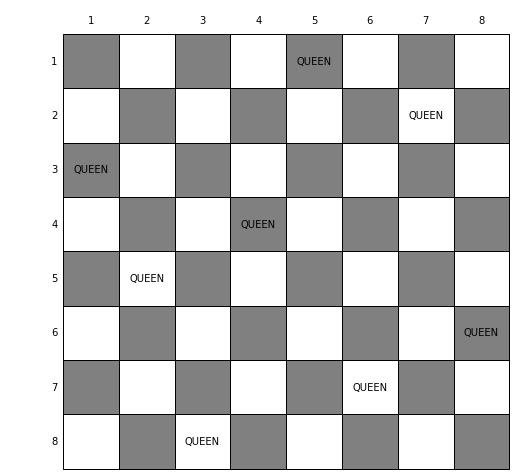

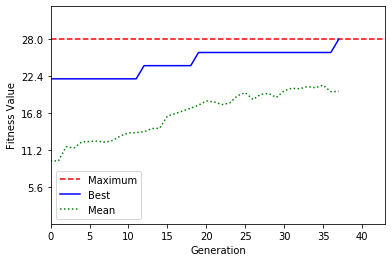

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Uncomment the desired case case:

# Parameters Case 1 - Low Population
NUMBER_OF_QUEENS = 8
GENERATIONS      = 100
MUTATION_RATE    = 0.3
POPULATION_SIZE  = 85

# Parameters Case 2 - High Population
# NUMBER_OF_QUEENS = 8
# GENERATIONS      = 15
# MUTATION_RATE    = 0.3
# POPULATION_SIZE  = 1000

# Parameters Case 3 - More queens
# NUMBER_OF_QUEENS = 20
# GENERATIONS      = 250
# MUTATION_RATE    = 0.45
# POPULATION_SIZE  = 600




# Create first population
population = Population(POPULATION_SIZE, NUMBER_OF_QUEENS)
genetic_algorithm = GA(NUMBER_OF_QUEENS, MUTATION_RATE)

max_checkmates = (NUMBER_OF_QUEENS * (NUMBER_OF_QUEENS - 1)) / 2
print('Max Fitness: ', max_checkmates)


def PopulationWithFitness(pop):
    '''Calculate the fitness for all members of the population'''
    fitness_population = []
    for ind in pop:
        fitness_population.append((genetic_algorithm.calculate_fitness(ind[1]), ind[1]))
    return fitness_population


def getBest(population):
    '''Get the best individue and its fitness'''
    max_fitness = max(population)[0]
    best_individue = max(population)[1]
    return best_individue, max_fitness

# Structures to be plotted later
best = []
mean = []

population.set(PopulationWithFitness(population.get()))

for i in range(1, GENERATIONS):
    best_individue, max_fitness = getBest(population.get())
    new_poulation = genetic_algorithm.generation(population.get())
    # Elitism
    new_poulation[0] = (max_fitness, best_individue)
    population.set(PopulationWithFitness(new_poulation))
    best.append(max_fitness)
    mean.append(sum([pair[0] for pair in population.get()]) / POPULATION_SIZE)
    
    clear_output(wait=True)
    print('Generation:\t', i, ' of ', GENERATIONS)
    print('Max Fitness:\t', max_checkmates)
    print('Best Fitness:\t', max_fitness)
    print('Best Individue:\t', best_individue)
    
    if max_fitness == max_checkmates:
        break

# Draw the board with the best solution
b = Board(NUMBER_OF_QUEENS)
Board.add_queens(b, best_individue)
Board.draw(b)


#Plot evaluation data
spacing = 5
plt.figure()
plt.axhline(y=max_checkmates, color='r', linestyle='dashed')
plt.plot(best, color='b', linestyle='solid')
plt.plot(mean, color='g', linestyle='dotted')

plt.axis([0, i + spacing, 0, max_checkmates + spacing])
ax = plt.gca()
ax.yaxis.set_ticks(
    [(4 * max_checkmates) / 5, (3 * max_checkmates) / 5, (2 * max_checkmates) / 5, max_checkmates / 5, max_checkmates])
plt.ylabel('Fitness Value')
plt.xlabel('Generation')
plt.legend(['Maximum', 'Best', 'Mean'])
plt.show(block=True)

### Please, consider evaluating mutiples times for diverse results

This work reveals that the N-Queens problem can be solved within a reasonable time by using Genetic Algorithm.

Using only 8 queens it becomes an easy problem to tackle, converging to the right solution at about 40 generations with moderate population size and mutatation rate.

2 other cases are proposed to better evalute the genetic algorithm.
One case with a higher population size and the other with with an elevated number of queens.

In both of them the algorithm is capable of finding a solution.


***
##  2. Rastrigin Function

##### Firstly, the population class is defined.
A population is a list of tuples, sized $size$: 
$[(fitness_1, individue_1),(fitness_2, individue_2),...,(fitness_n, individue_n)]$

An individue is a list of variables, sized $n$, within a resolution $res$.

Assuming $res = 3$ and $n = 4$:

$[[0,0,1],[1,0,1],[1,1,1],[0,0,0]]$

In [6]:
import random


class Population:

    def __init__(self, size, n, res):
        self.population = []
        self.n = n
        self.resolution = res
        for i in range(size):
            self.population.append(self.createRandomIndividue())

    def get(self):
        return self.population

    def set(self, population):
        self.population = population

    def createRandomIndividue(self):
        individue = []
        for i in range(self.n):
            variable = []
            for j in range(self.resolution):
                variable.append(random.randint(0, 1))
            individue.append(variable)
        return 0, individue


##### Here the Genetic Algorithm class is defined.

In [7]:
import random
import math


class GA:

    def __init__(self, n, mutation_rate, res):
        '''Define parameters and create a population of N elements, each randomly generated'''
        self.n = n
        self.mutation_rate = mutation_rate
        self.resolution = res

    def selection(self, pop):
        '''
        Tournament based parent selection:
        2 random individues are picked from the population and the most fit is selected.
        This is done twice and two parents are selected.
        '''
        parents = []
        for j in range(2):
            first_candidate_index = random.randint(1, len(pop) - 1)
            second_candidate_index = random.randint(1, len(pop) - 1)
            first_candidate_fitness = pop[first_candidate_index][0]
            second_candidate_fitness = pop[second_candidate_index][0]
            if first_candidate_fitness > second_candidate_fitness:
                parents.append(pop[first_candidate_index])
            else:
                parents.append(pop[second_candidate_index])
        return parents

    def roulette(self, population):
        '''
        Selection proportional to fitness
        '''
        parents = []
        for j in range(2):
            max = sum([c[0] for c in population])
            pick = random.uniform(0, max)
            current = 0
            for ind in population:
                current += ind[0]
                if current > pick:
                    parents.append(ind)
                    break
        return parents

    def crossover(self, parents):
        '''Create siblings combining the genotype of two parents'''
        first_child = []
        second_child = []
        for i in range(self.n):
            first_child.append(parents[0][1][i][:self.n // 2] + parents[1][1][i][self.n // 2:])
            second_child.append(parents[1][1][i][:self.n // 2] + parents[0][1][i][self.n // 2:])
        return [first_child, second_child]

    def mutation(self, individues):
        '''
        Bitflip a random half of every variable based on a given probability
        '''
        for ind in individues:
            for var in ind:
                if random.random() <= self.mutation_rate:
                    number_of_mutations = self.resolution // 2
                    index = random.sample(range(0, len(var)), number_of_mutations)
                    for j in range(number_of_mutations):
                        var[index[j]] = 1 - var[index[j]]
        return individues

    def calculate_fitness(self, x):
        '''
        The fitness calculation is mapped from 0 to 100 to facilitate other steps
        '''
        val = self.rastrigin(x)
        return self.map(val, 289.247137257859, 0, 0, 100)

    def rastrigin(self, x):
        f = 10 * self.n
        for i in range(0, self.n):
            f = f + (math.pow(x[i], 2) - 10 * math.cos(2 * math.pi * x[i]))
        return f

    def generation(self, population):
        '''
        1. Selection: Pick two parents with a probability of using a roullet or tournament for the selection method
        2. Crossover: Create two childs combining the genotype of these two parents
        3. Mutation: Mutate the child based on a given probability
        4. Add the children to a new population
        '''
        new_population = []
        for i in range(int(len(population) / 2)):
            if random.random() <= 0.5:
                parents = self.selection(population)
            else:
                parents = self.roulette(population)
            children = self.crossover(parents)
            children = self.mutation(children)
            for child in children:
                new_population.append((0, child))
        return new_population

    def map(self, x, in_min, in_max, out_min, out_max):
        return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min


In [8]:
##### Main Execution

Fitness Calculations:	 10000  of  10000
Generation:	 2499  of  2500
Best Fitness:	 0.8422856060904618


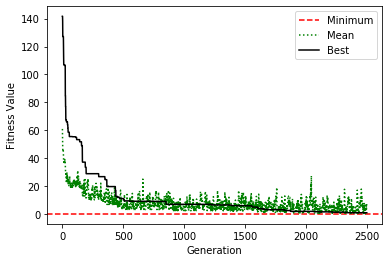

Best Individue:	 [-0.005004887585532636, 0.03503421309872934, 0.005004887585532636, -0.015014662756597907, 0.02502443792766318, 0.005004887585532636, -0.03503421309872934, 0.015014662756597907, -0.005004887585532636, -0.025024437927664067]
Best Fitness:	 0.8422856060904618


In [17]:
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

TIMES_CALC = 0

def hugo_juste(nvar, ncal):
    '''As requested'''
    NUMBER_OF_VARIABLES = nvar
    RESOLUTION = 10

    MUTATION_RATE = 0.0225
    POPULATION_SIZE = 4
    GENERATIONS = ncal // POPULATION_SIZE


    def bin_to_int(ind):
        '''maps a binary to a given real interval'''
        vars = []
        for var in ind:
            lower = -5.12
            upper = 5.12
            l = len(ind)
            delta = (upper - lower) / (math.pow(2, l) - 1)
            k = 0
            for j in range(l):
                k = k + var[j] * math.pow(2, l - j - 1)
            vars.append(lower + delta * k)
        return vars


    def PopulationWithFitness(pop):
        '''Calculate the fitness for all members of the population'''
        fitness_population = []
        for ind in pop:
            fitness_population.append((genetic_algorithm.calculate_fitness(bin_to_int(ind[1])), ind[1]))
            global TIMES_CALC
            TIMES_CALC += 1
        return fitness_population


    def getBest(population):
        '''Get the best individue and its fitness'''
        best_individue = max(population)[1]
        min_fitness = genetic_algorithm.rastrigin(bin_to_int(best_individue))
        return best_individue, min_fitness

    # Create first population
    population = Population(POPULATION_SIZE, NUMBER_OF_VARIABLES, RESOLUTION)
    genetic_algorithm = GA(NUMBER_OF_VARIABLES, MUTATION_RATE, RESOLUTION)



    population.set(PopulationWithFitness(population.get()))

    best_min = []
    mean = []
    for i in range(1, GENERATIONS):
        best_individue, min_fitness = getBest(population.get())
        new_poulation = genetic_algorithm.generation(population.get())
        # Elitism
        new_poulation[0] = (min_fitness, best_individue)
        population.set(PopulationWithFitness(new_poulation))
        best_min.append(genetic_algorithm.rastrigin(bin_to_int(best_individue)))
        mean.append(sum([100 - pair[0] for pair in population.get()]) / POPULATION_SIZE)
        
        clear_output(wait=True)
        print('Fitness Calculations:\t', TIMES_CALC, ' of ', ncal)
        print('Generation:\t', i, ' of ', GENERATIONS)
        print('Best Fitness:\t', min_fitness)
        
        if TIMES_CALC >= ncal:
            break


    # Plot evaluation data
    plt.figure()
    plt.axhline(y=0, color='r', linestyle='dashed')
    plt.plot(mean, color='g', linestyle='dotted')
    plt.plot(best_min, color='k', linestyle='solid')
    plt.ylabel('Fitness Value')
    plt.xlabel('Generation')
    plt.legend(['Minimum', 'Mean', 'Best'])
    plt.show()
    
    return bin_to_int(best_individue), min_fitness


[best_individue, min_fitness] = hugo_juste(10, 10000)
print('Best Individue:\t', best_individue)
print('Best Fitness:\t', min_fitness)

### Please, consider evaluating mutiples times for diverse results

The rastrigin function has a lot of local minima.

It is a perfect candidate function to evaluate the capabilities of the genetic algorithm as the GA parameters must be wisely chosen or it wont converge to the global minimum.

With the restriction of having a finite number of evaluations of the fitness function, it becomes a much harder problem.

Given the restriction, it was possible to have fewer generations with large populations or more generations with small population. The second case was chosen to make possible more crossover and mutation operations that would increase the diversity.

With the restrictions and a low population, the only operation possible to increase diversity was the mutation.

It was chosen that the chance to occur a mutation must be low, but when a mutation happens, it should change a lot of the individue to increase diversity and get out of a local minimum.

With that aproach, it is possible to get values around 0, the global minimum, showing that even with the imposed restrictions, the genetic algorith is still capable of solving a much harder problem.